In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from utils import plot_clusters, plot
import numpy as np
import os
from pandas.api.types import is_string_dtype
import matplotlib.pyplot as plt

### Загружаем данные

In [2]:
data_filenames = [name for name in os.listdir() if name.startswith("ЦУР")]
data_filenames

['ЦУР1.csv',
 'ЦУР11.csv',
 'ЦУР13.csv',
 'ЦУР15.csv',
 'ЦУР2.csv',
 'ЦУР3.csv',
 'ЦУР4.csv',
 'ЦУР5.csv',
 'ЦУР6.csv',
 'ЦУР7.csv',
 'ЦУР8.csv']

In [3]:
dfs = [pd.read_csv(filename, decimal=',') for filename in data_filenames]

### Удаляем 2023 2024 колонки

In [4]:
dfs = [df.drop("2023", axis=1) for df in dfs if "2023" in df.columns]
dfs = [df.drop("2024", axis=1) for df in dfs if "2024" in df.columns]

### Одинаковые название колонок

In [5]:
for df in dfs:
    df.columns = dfs[0].columns
    print(df.columns)

Index(['ЦУР', 'Субъект РФ', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022'],
      dtype='object')
Index(['ЦУР', 'Субъект РФ', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022'],
      dtype='object')
Index(['ЦУР', 'Субъект РФ', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022'],
      dtype='object')
Index(['ЦУР', 'Субъект РФ', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022'],
      dtype='object')
Index(['ЦУР', 'Субъект РФ', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022'],
      dtype='object')
Index(['ЦУР', 'Субъект РФ', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022'],
      dtype='object')
Index(['ЦУР', 'Субъект РФ', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022'],
      dtype='object')
Index(['ЦУР', 'Субъект РФ', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022'],
      dtype='object')


### Склеиваем в один df

In [6]:
df_ro = pd.concat(dfs)

In [7]:
df_ro

,ЦУР,Субъект РФ,2016,2017,2018,2019,2020,2021,2022
0,1.2.2,РФ,"13,2","12,9","12,6","12,3","12,1","11,","9,8"
1,1.2.2,ЮФО,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.2.2,РО,"14,2","13,9","13,2","13,3","13,","12,","10,5"
3,1.3.1,РФ,230 710,299 752,308 815,326 293,604 856,980 845,909 426
4,1.3.1,Республика Адыгея (Адыгея),"139,","112,","118,","128,","143,",NaN,"2715,"
...,...,...,...,...,...,...,...,...,...
34,8.8.2,ЮФО,0.0,0.0,0.0,NaN,0.0,0.0,NaN
35,8.8.2,РО,14.2,13.9,13.2,13.3,13.0,12.0,10.5
36,8.9.1,РФ,3.4,2.7,2.7,2.8,2.4,2.6,2.62
37,8.9.1,ЮФО,NaN,NaN,NaN,4.7,4.1,4.6,NaN


In [8]:
df_ro.set_index("ЦУР", inplace=True)

### Достаем только РО

In [9]:
df_ro = df_ro[df_ro["Субъект РФ"] == "РО"]

In [10]:
df_ro

,Субъект РФ,2016,2017,2018,2019,2020,2021,2022
ЦУР,,,,,,,,
1.2.2,РО,"14,2","13,9","13,2","13,3","13,","12,","10,5"
1.3.1,РО,2 241,2 029,4 905,8 689,6 921,NaN,23 687
1.4.1,РО,"61,2","63,","64,3","67,5","66,97","68,74","73,74"
1.4.2,РО,"6227,1","6233,7","6246,6","6255,6","6241,6","6245,7","6271,7"
1.5.1 Пострадавшие,РО,"135,","648,","50,","61,","281,","235,",NaN
...,...,...,...,...,...,...,...,...
8.8.1.b,РО,NaN,NaN,NaN,83.3,90.0,NaN,90.3
8.8.1.c,РО,NaN,NaN,NaN,0.89,3.22,NaN,NaN
8.8.1.d,РО,NaN,NaN,NaN,5.7,12.91,NaN,9.87


In [11]:
df_ro.drop("Субъект РФ", axis=1, inplace=True)

C:\Users\yxtag\AppData\Local\Temp\ipykernel_31588\3480877717.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ro.drop("Субъект РФ", axis=1, inplace=True)


### Приведение типов

In [12]:
df_ro["2016"].str.replace(",", ".")

ЦУР
1.2.2                   14.2
1.3.1                  2 241
1.4.1                   61.2
1.4.2                 6227.1
1.5.1 Пострадавшие      135.
                       ...  
8.8.1.b                  NaN
8.8.1.c                  NaN
8.8.1.d                  NaN
8.8.2                    NaN
8.9.1                    NaN
Name: 2016, Length: 173, dtype: object

In [13]:
df_ro1 = pd.DataFrame(index=df_ro.index)

In [14]:
numeric_columns = df_ro.columns[:]
for num_col in numeric_columns:
    df_ro1[num_col] = df_ro[num_col].str.replace(",", ".")
    df_ro1[num_col] = df_ro1[num_col].str.replace(" ", "")
    df_ro1[num_col] = df_ro1[num_col].str.replace("…", "")
    df_ro1[num_col] = df_ro1[num_col].str.replace("...", "") 
    df_ro1[num_col] = df_ro1[num_col].str.replace("–", "") 
    df_ro1[num_col] = df_ro1[num_col].str.replace("-", "")

In [15]:
df_ro = df_ro1.apply(pd.to_numeric)
del df_ro1

In [16]:
df_ro

,2016,2017,2018,2019,2020,2021,2022
ЦУР,,,,,,,
1.2.2,14.2,13.9,13.2,13.3,13.00,12.00,10.50
1.3.1,2241.0,2029.0,4905.0,8689.0,6921.00,NaN,23687.00
1.4.1,61.2,63.0,64.3,67.5,66.97,68.74,73.74
1.4.2,6227.1,6233.7,6246.6,6255.6,6241.60,6245.70,6271.70
1.5.1 Пострадавшие,135.0,648.0,50.0,61.0,281.00,235.00,NaN
...,...,...,...,...,...,...,...
8.8.1.b,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8.8.1.c,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8.8.1.d,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df_ro.dtypes

2016    float64
2017    float64
2018    float64
2019    float64
2020    float64
2021    float64
2022    float64
dtype: object

### Работа с пропусками

In [18]:
nan_rows = df_ro[df_ro.isna().any(axis=1)]

In [19]:
nan_rows

,2016,2017,2018,2019,2020,2021,2022
ЦУР,,,,,,,
1.3.1,2241.0,2029.0,4905.0,8689.00,6921.00,NaN,23687.00
1.5.1 Пострадавшие,135.0,648.0,50.0,61.00,281.00,235.00,NaN
1.5.1 Погибшие,77.0,12.0,21.0,20.00,15.00,30.00,NaN
1.5.2,61340.0,3819811.8,NaN,51276.00,451548.00,16227.00,4027.89
11.1.1,NaN,NaN,NaN,0.23,0.28,0.28,0.24
...,...,...,...,...,...,...,...
8.8.1.b,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8.8.1.c,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8.8.1.d,NaN,NaN,NaN,NaN,NaN,NaN,NaN


удаляем если больше половины пропусков

In [20]:
df_ro = df_ro.dropna(thresh=int(len(numeric_columns) / 2 + 1))

In [21]:
df_ro

,2016,2017,2018,2019,2020,2021,2022
ЦУР,,,,,,,
1.2.2,14.2,13.9,13.2,13.3,13.00,12.00,10.50
1.3.1,2241.0,2029.0,4905.0,8689.0,6921.00,NaN,23687.00
1.4.1,61.2,63.0,64.3,67.5,66.97,68.74,73.74
1.4.2,6227.1,6233.7,6246.6,6255.6,6241.60,6245.70,6271.70
1.5.1 Пострадавшие,135.0,648.0,50.0,61.0,281.00,235.00,NaN
...,...,...,...,...,...,...,...
Т4.7.1,7345.0,7567.0,6983.0,6652.0,NaN,NaN,NaN
Т4.7.2,15040.0,16930.0,17117.0,17223.0,NaN,NaN,NaN
Т4.7.3,39524.0,32096.0,31641.0,30497.0,NaN,NaN,NaN


In [22]:
df_ro[df_ro.isna().any(axis=1)] = df_ro[df_ro.isna().any(axis=1)].T.interpolate(method="linear", limit_direction='both').T

C:\Users\yxtag\AppData\Local\Temp\ipykernel_31588\3599901758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ro[df_ro.isna().any(axis=1)] = df_ro[df_ro.isna().any(axis=1)].T.interpolate(method="linear", limit_direction='both').T
C:\Users\yxtag\AppData\Local\Temp\ipykernel_31588\3599901758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ro[df_ro.isna().any(axis=1)] = df_ro[df_ro.isna().any(axis=1)].T.interpolate(method="linear", limit_direction='both').T


In [23]:
df_ro

,2016,2017,2018,2019,2020,2021,2022
ЦУР,,,,,,,
1.2.2,14.2,13.9,13.2,13.3,13.00,12.00,10.50
1.3.1,2241.0,2029.0,4905.0,8689.0,6921.00,15304.00,23687.00
1.4.1,61.2,63.0,64.3,67.5,66.97,68.74,73.74
1.4.2,6227.1,6233.7,6246.6,6255.6,6241.60,6245.70,6271.70
1.5.1 Пострадавшие,135.0,648.0,50.0,61.0,281.00,235.00,235.00
...,...,...,...,...,...,...,...
Т4.7.1,7345.0,7567.0,6983.0,6652.0,6652.00,6652.00,6652.00
Т4.7.2,15040.0,16930.0,17117.0,17223.0,17223.00,17223.00,17223.00
Т4.7.3,39524.0,32096.0,31641.0,30497.0,30497.00,30497.00,30497.00


### Нормализация

In [24]:
scaler = StandardScaler()

In [25]:
scaled_rows = []
for i in range(df_ro.shape[0]):
    row = df_ro.iloc[i]
    scaled_row = scaler.fit_transform(row.values.reshape(-1, 1))
    scaled_rows.append([el[0] for el in scaled_row.tolist()])

# Convert the scaled rows back to a DataFrame
scaled_df_ro = pd.DataFrame(scaled_rows, columns=df_ro.columns)

In [26]:
scaled_df_ro.set_index(df_ro.index, inplace=True)

In [27]:
scaled_df_ro

,2016,2017,2018,2019,2020,2021,2022
ЦУР,,,,,,,
1.2.2,1.139583,0.882258,0.281832,0.367607,0.110282,-0.747468,-2.034094
1.3.1,-0.943865,-0.972992,-0.577852,-0.057960,-0.300869,0.850889,2.002648
1.4.1,-1.374250,-0.906894,-0.569359,0.261497,0.123887,0.583454,1.881665
1.4.2,-1.397150,-0.909256,0.044354,0.709664,-0.325262,-0.022177,1.899828
1.5.1 Пострадавшие,-0.532154,2.197795,-0.984484,-0.925947,0.244791,0.000000,0.000000
...,...,...,...,...,...,...,...
Т4.7.1,1.166713,1.789333,0.151448,-0.776874,-0.776874,-0.776874,-0.776874
Т4.7.2,-2.427291,0.101496,0.351698,0.493524,0.493524,0.493524,0.493524
Т4.7.3,2.400209,-0.026934,-0.175608,-0.549417,-0.549417,-0.549417,-0.549417


### Сокращение размерности PCA (для визуализации)

In [28]:
pca = PCA(n_components=2)

In [29]:
scaled_df_ro_dim_red = pca.fit_transform(scaled_df_ro)

In [30]:
scaled_df_ro_dim_red = pd.DataFrame(data=scaled_df_ro_dim_red, columns=['PC1', 'PC2'], index=scaled_df_ro.index)

In [31]:
scaled_df_ro_dim_red

,PC1,PC2
ЦУР,,
1.2.2,-2.234975,0.807132
1.3.1,2.372522,-0.650368
1.4.1,2.558021,-0.042896
1.4.2,2.130933,0.460226
1.5.1 Пострадавшие,-0.148971,0.629268
...,...,...
Т4.7.1,-2.192194,0.146276
Т4.7.2,2.062365,1.885980
Т4.7.3,-1.983331,-1.404174


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


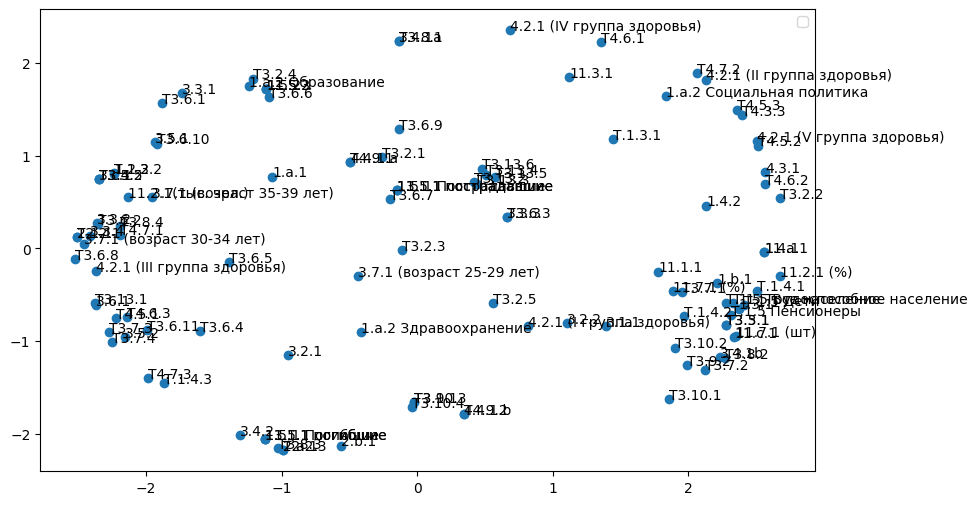

In [32]:
plot(scaled_df_ro_dim_red, "PC1", "PC2")

### Кластеризация

In [33]:
from sktime.clustering.k_means import TimeSeriesKMeans

In [34]:
hierarchial_clustering = AgglomerativeClustering(n_clusters=5)
kmeans = TimeSeriesKMeans(n_clusters=5) 

In [35]:
no_reduce_df_labels_agglom = hierarchial_clustering.fit_predict(scaled_df_ro)
no_reduce_df_labels_kmeans = kmeans.fit_predict(np.array(scaled_df_ro).reshape(*(np.array(scaled_df_ro).shape),1))

In [36]:
df_ro_clusters = df_ro.copy()

In [37]:
df_ro_clusters["AgglomerativeClustering"] = no_reduce_df_labels_agglom
scaled_df_ro_dim_red["AgglomerativeClustering"] = no_reduce_df_labels_agglom

df_ro_clusters["KMeans"] = no_reduce_df_labels_kmeans
scaled_df_ro_dim_red["KMeans"] = no_reduce_df_labels_kmeans

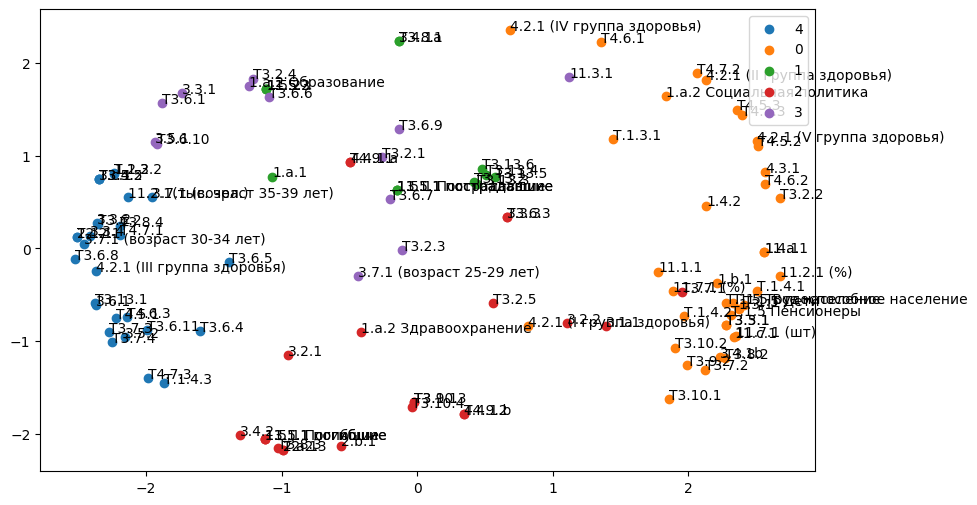

In [38]:
plot_clusters(scaled_df_ro_dim_red, "PC1", "PC2", "AgglomerativeClustering")

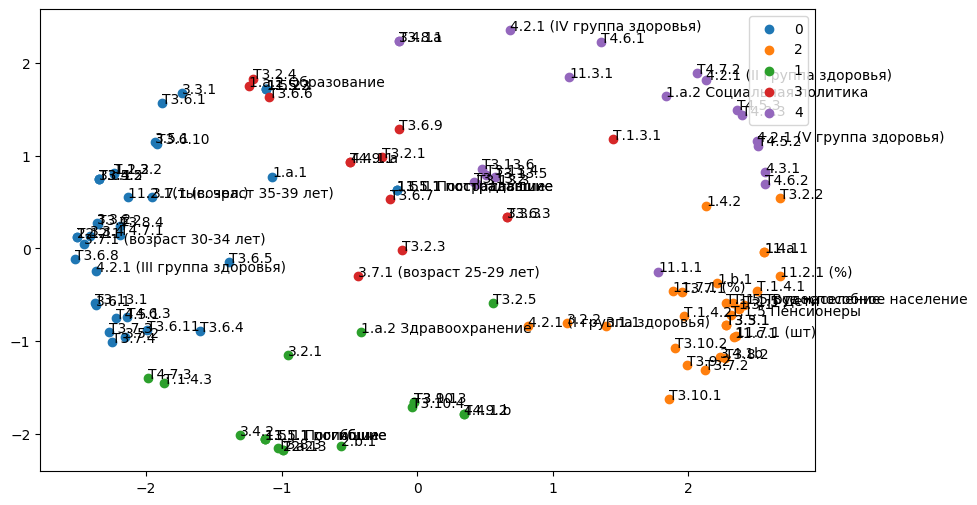

In [39]:
plot_clusters(scaled_df_ro_dim_red, "PC1", "PC2", "KMeans")

In [40]:
df_ro_clusters.to_csv("clustering.csv")

### Матрицы корреляций по кластерам

In [41]:
scaled_df_ro_clusters = scaled_df_ro.copy()
df_ro_clusters["AgglomerativeClustering"] = no_reduce_df_labels_agglom
df_ro_clusters["KMeans"] = no_reduce_df_labels_kmeans

scaled_df_ro_clusters["AgglomerativeClustering"] = no_reduce_df_labels_agglom
scaled_df_ro_clusters["KMeans"] = no_reduce_df_labels_kmeans

In [42]:
scaled_df_ro_clusters["AgglomerativeClustering"].unique()

array([4, 0, 1, 2, 3], dtype=int64)

In [43]:
scaled_df_ro_clusters["KMeans"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [44]:
clusters_agglom = []
clusters_kmeans = []
for i in scaled_df_ro_clusters["AgglomerativeClustering"].unique():
    clusters_agglom.append(scaled_df_ro_clusters[scaled_df_ro_clusters["AgglomerativeClustering"] == i])

for i in scaled_df_ro_clusters["KMeans"].unique():
    clusters_kmeans.append(scaled_df_ro_clusters[scaled_df_ro_clusters["KMeans"] == i])

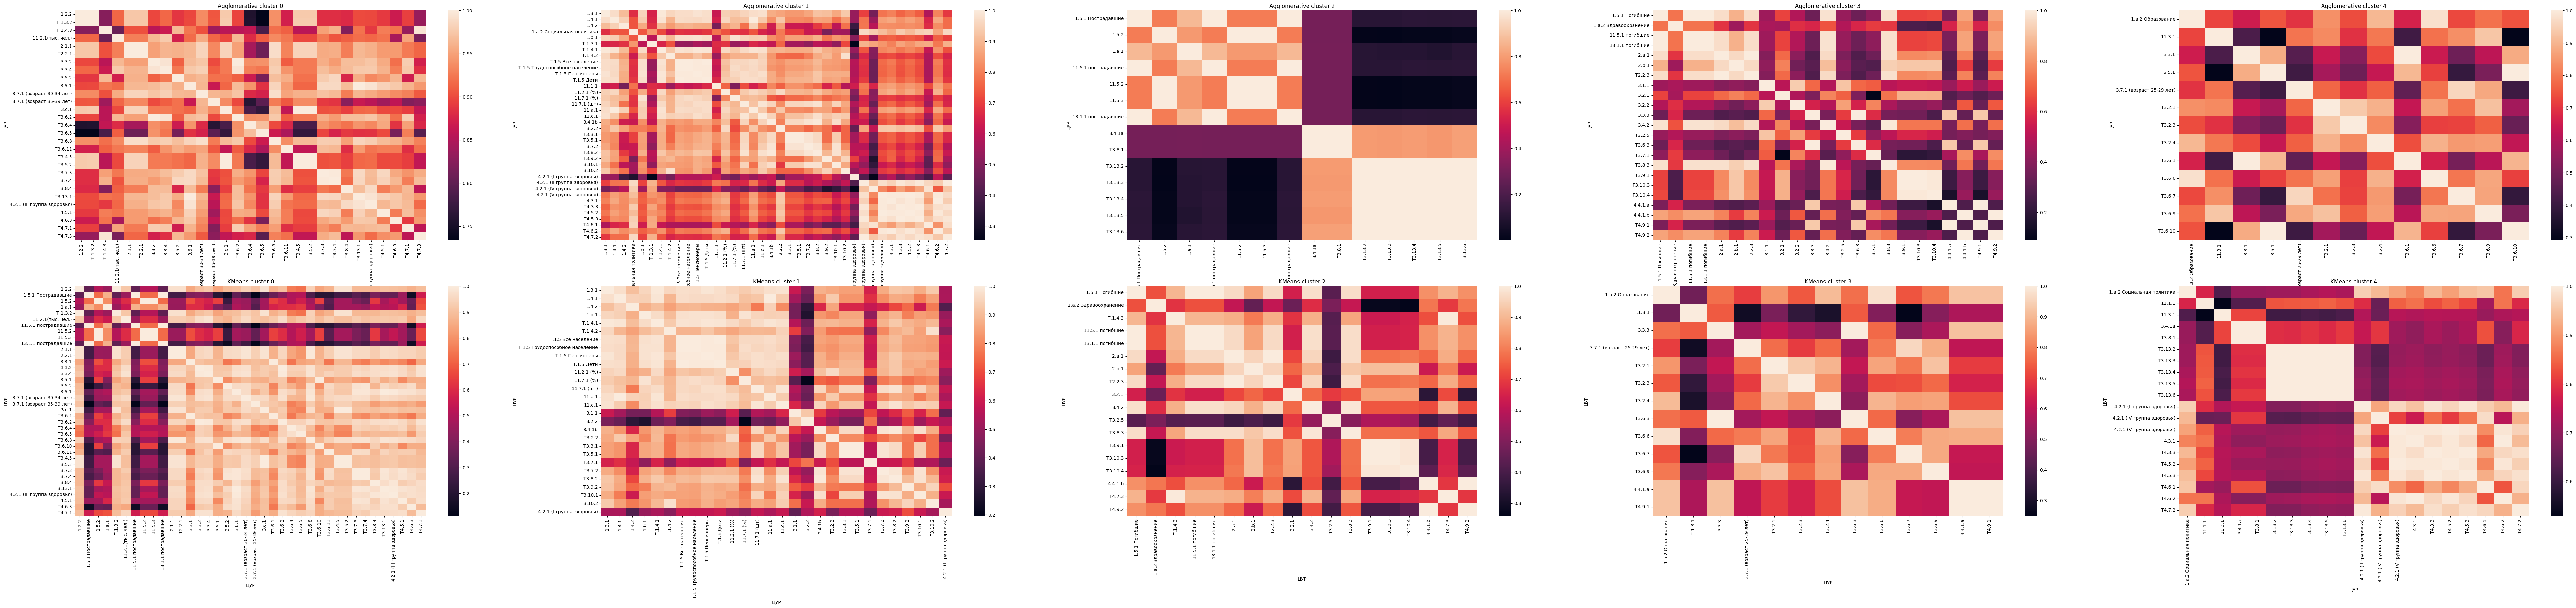

In [45]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(nrows=2, ncols=len(scaled_df_ro_clusters["KMeans"].unique()), figsize=(100, 20))

# Plot data on each subplot

for j in range(len(clusters_agglom)):
    sns.heatmap(clusters_agglom[j].T.corr().abs(), ax=axs[0][j])
    axs[0][j].set_title(f'Agglomerative cluster {j}')

for j in range(len(clusters_kmeans)):
    sns.heatmap(clusters_kmeans[j].T.corr().abs(), ax=axs[1][j])
    axs[1][j].set_title(f'KMeans cluster {j}')

# # Remove unused subplots
# for i in range(2, 6):
#     fig.delaxes(axs[1, i])

# Display the figure with subplots
plt.show()


### Прогноз

In [57]:
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.arch import ARCH
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sklearn.metrics import mean_absolute_percentage_error

In [47]:
arima = AutoARIMA(seasonal=False)
arch = ARCH()
exp = ExponentialSmoothing()

In [58]:
model_choices = []
predict_2023 = []
predict_2024 = []

for idx, row in df_ro.iterrows():
    time_series = row.values # list
    # get predictions
    arch_predict = np.squeeze(arch.fit_predict(time_series, fh=range(len(time_series)+2)))
    arima_predict = np.squeeze(arima.fit_predict(time_series, fh=range(len(time_series)+2)))
    exp_predict = np.squeeze(exp.fit_predict(time_series, fh=range(len(time_series)+2)))
    # compute metric
    arch_mape = mean_absolute_percentage_error(time_series, arch_predict[:-2])
    arima_mape = mean_absolute_percentage_error(time_series, arima_predict[:-2])
    exp_mape = mean_absolute_percentage_error(time_series, exp_predict[:-2])

    min_mape = min(arch_mape, arima_mape, exp_mape)
    if min_mape == arch_mape:
        model_choices.append("arch")
        predict_2023.append(arch_predict[-2])
        predict_2024.append(arch_predict[-1])
    elif min_mape == arima_mape:
        model_choices.append("arima")
        predict_2023.append(arima_predict[-2])
        predict_2024.append(arima_predict[-1])
    else:
        model_choices.append("exp")
        predict_2023.append(exp_predict[-2])
        predict_2024.append(exp_predict[-1])

e:\SDG\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
e:\SDG\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
e:\SDG\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
e:\SDG\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
e:\SDG\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-s

In [59]:
df_ro_forecast = df_ro.copy()

In [60]:
df_ro_forecast["Model"] = model_choices
df_ro_forecast["2023_forecast"] = predict_2023
df_ro_forecast["2024_forecast"] = predict_2024

In [61]:
df_ro_forecast

,2016,2017,2018,2019,2020,2021,2022,Model,2023_forecast,2024_forecast
ЦУР,,,,,,,,,,
1.2.2,14.2,13.9,13.2,13.3,13.00,12.00,10.50,arch,12.972090,12.972090
1.3.1,2241.0,2029.0,4905.0,8689.0,6921.00,15304.00,23687.00,arch,9110.857058,9110.857058
1.4.1,61.2,63.0,64.3,67.5,66.97,68.74,73.74,arch,66.501947,66.501947
1.4.2,6227.1,6233.7,6246.6,6255.6,6241.60,6245.70,6271.70,arima,6246.000000,6246.000000
1.5.1 Пострадавшие,135.0,648.0,50.0,61.0,281.00,235.00,235.00,exp,234.105566,234.105566
...,...,...,...,...,...,...,...,...,...,...
Т4.7.1,7345.0,7567.0,6983.0,6652.0,6652.00,6652.00,6652.00,exp,6652.000000,6652.000000
Т4.7.2,15040.0,16930.0,17117.0,17223.0,17223.00,17223.00,17223.00,exp,17223.000000,17223.000000
Т4.7.3,39524.0,32096.0,31641.0,30497.0,30497.00,30497.00,30497.00,exp,30497.000000,30497.000000


In [62]:
df_ro_forecast.to_csv("forecats.csv")